In [14]:
class neuronne:
    def __init__(self, nb_inputs, biais):
        self.poids = [random() for _ in range(nb_inputs)]
        self.biais = biais
        self.inputs_forward = None  

    def forward(self, inputs):
        self.inputs_forward = inputs 
        return self.activation(inputs)

    def activation(self, inputs):
        
        z = sum(w * x for w, x in zip(self.poids, inputs)) + self.biais
        return 1 / (1 + math.exp(-z))

    def backward(self, error):
        inputs = self.inputs_forward 
        derivative = self.activation_derivative(inputs)
        
        for i in range(len(self.poids)):
            self.poids[i] += error * derivative * inputs[i]
        self.biais += error * derivative

    def activation_derivative(self, inputs):
        
        z = sum(w * x for w, x in zip(self.poids, inputs)) + self.biais
        activation_output = self.activation(inputs)
        return activation_output * (1 - activation_output)
    def display(self):
        print("Weights:", self.poids)
        print("Bias:", self.biais)


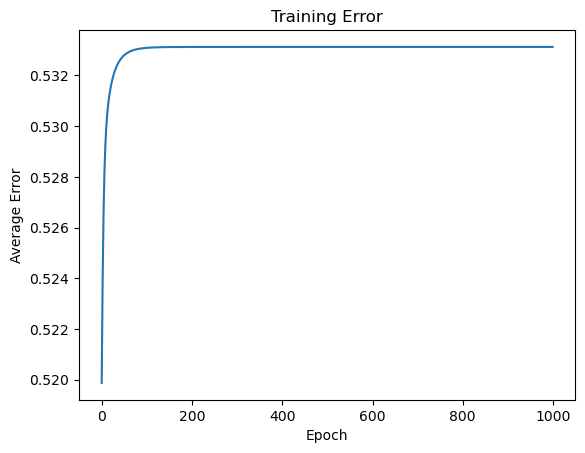

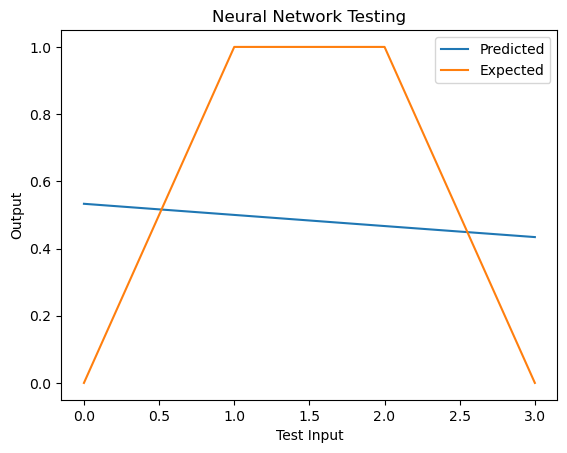

In [15]:
import math

# Your code here

from random import random
import matplotlib.pyplot as plt

# Generate sample inputs and expected outputs for testing
inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
expected_outputs = [0, 1, 1, 0]

# Create an instance of the neuronne class
n = neuronne(2, 0)

# Train the neural network
epochs = 1000
errors = []
for epoch in range(epochs):
    total_error = 0
    for i in range(len(inputs)):
        # Forward propagation
        output = n.forward(inputs[i])
        
        # Calculate the error
        error = expected_outputs[i] - output
        total_error += abs(error)
        
        # Backward propagation
        n.backward(error)
    
    # Calculate the average error for the epoch
    avg_error = total_error / len(inputs)
    errors.append(avg_error)

# Plot the training error
plt.plot(range(epochs), errors)
plt.xlabel('Epoch')
plt.ylabel('Average Error for this axe')
plt.title('Training Error for this axe')
plt.show()

# Test the neural network
test_inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
predicted_outputs = []
for i in range(len(test_inputs)):
    output = n.forward(test_inputs[i])
    predicted_outputs.append(output)

# Plot the predicted outputs and expected outputs
plt.plot(range(len(test_inputs)), predicted_outputs, label='Predicted')
plt.plot(range(len(test_inputs)), expected_outputs, label='Expected')
plt.xlabel('Test Input')
plt.ylabel('Output')
plt.title('Neural Network Testing')
plt.legend()
plt.show()


In [16]:
n.display()

Weights: [-0.26539275477044666, -0.13269637738522316]
Bias: 0.13269637738522308
